<font face = 'sans-serif'> <h1> <center> FEATURE SELECTION  using Wrapper methods in Python </center> </h1> <br>
<font face = 'verdana'>    <right ><a href = "https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f"> <sup>*</sup>Content copied from.... </a> <right><br>

In order to perform any machine learning task or to get insights from such high dimensional data, feature selection becomes very important. Since some features may be irrelevant or less significant to the dependent variable so their unnecessary inclusion to the model leads to <br>
• Increase in complexity of a model and makes it harder to interpret. <br>
• Increase in time complexity for a model to get trained.<br>
• Result in a dumb model with inaccurate or less reliable predictions. <br>
Hence, it gives an indispensable need to perform feature selection. Feature selection is very crucial and must component in machine learning and data science workflows especially while dealing with high dimensional datasets.

<font face = 'verdana'> <h2>What is Feature selection? </h2>  <br>
As the name suggests, it is a process of selecting the most significant and relevant features from a vast set of features in the given dataset.<br>
For a dataset with <b>d</b> input features, <b> <i>the feature selection</i></b> process results in <b>k</b> features such that k < d,where k is the smallest set of significant and relevant features.<br>
So feature selection helps in finding the smallest set of features which results in : <br>
• <b>Training </b> a machine learning algorithm faster.  <br>
• Reducing the <b> complexity </b> of a model and making it easier to <b>interpret.</b>  <br>
• Building a <b>sensible model</b> with <b>better prediction power.</b>  <br>
• <b>Reducing overfitting</b> by selecting the right set of features.  <br>

<font face = 'verdana'> Feature selection methods
For a dataset with d features, if we apply hit and trial method with all possible combinations of features then total 2<sup>d</sup> — 1 models need to be evaluated for a significant set of features. It is a time-consuming approach, therefore, we use feature selection techniques to find out the smallest set of features more efficiently.
There are three types of feature selection techniques :
1. Filter methods
2. Wrapper methods
3. Embedded methods<br>
Difference between Filter, Wrapper and Embedded methods

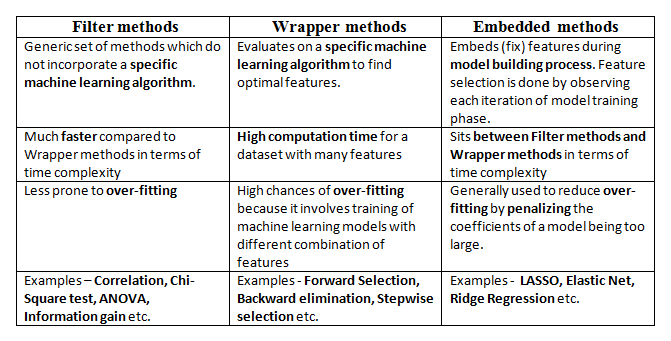


<font face = 'verdana'> <h2>Wrapper methods </h2> <br>
In wrapper <i>methods </i>, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.<br>
It follows a <i>greedy search approach</i> by evaluating all the possible combinations of features against <i>the evaluation criterion.</i> <br> The evaluation criterion is simply the performance measure which depends on the type of problem, for eg. <i>for regression </i >evaluation criterion can be p-values, R-squared, Adjusted R-squared.<br> Similarly <i>for classification </i>the evaluation criterion can be accuracy, precision, recall, f1-score, etc. Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm.

<img src="images\Wraper_Method.gif">

<font face = 'verdana'> Most commonly used techniques under wrapper methods are:
1. Forward selection
2. Backward elimination
3. Bi-directional elimination(Stepwise Selection)

<font face = 'verdana'> Too much theory so far. Now let us discuss wrapper methods with an example of <b> Boston house prices dataset </b>available in sklearn. The dataset contains 506 observations of 14 different features. The dataset can be imported using <mark>load_boston()</mark>function available in sklearn.datasets module.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [4]:
#Let’s convert this raw data into a data frame including target variable and actual data along with feature names.
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix 
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#Here, the target variable is Price. We will be fitting a regression model to predict Price byselecting optimal features 
#through wrapper methods.

<font face = 'verdana'><h2> 1. Forward selection :</h2> <br>
In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum<i> p-value.</i> Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual feature less than the <i>significance level </i>.
In short, the steps for forward selection technique are as follows :
1. Choose a significance level (e.g. SL = 0.05 with a 95% confidence).<br>
2. Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible.<br> Select the feature with the lowest p-value.<br>
3. Fit all possible models with one extra feature added to the previously selected feature(s).<br>
4. Again, select the feature with minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.

<font face = 'verdana'>Implementing Forward selection using built-in functions in Python: <br>
<mark>mlxtend library </mark> contains built-in implementation for most of the wrapper methods based feature selection techniques. <br> <mark style="background-color: #EBDEF0 " > SequentialFeatureSelector()</mark>  function comes with various combinations of feature selection techniques.

In [6]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(), k_features=11, forward=True, floating=False, scoring = 'r2', cv = 0)

In [7]:
sfs.fit(X, y)
sfs.k_feature_names_

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

<font face = 'verdana'> <font color = "#8E44AD" >SequentialFeatureSelector()</font> function accepts the following major arguments : <br>
• LinearRegression() as an estimator for the entire process. Similarly, it can be any classification based algorithm. <br>
• k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.<br>
• forward and floating arguments for different flavors of wrapper methods, here, forward = True and floating = False are for forward selection technique.<br>
• Scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.<br>
• cv argument is for k-fold cross-validation.<br>
Now let’s fit the above-defined feature selector on Boston house price dataset.

In [24]:
#Performing Mutiple linear Regression on boston dataset using feature extracted from  forward selection..
X = pd.DataFrame(bos[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']])          
y = pd.DataFrame(bos['Price'])

In [26]:
X.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [29]:
from sklearn.model_selection import train_test_split
#split the data in 80/20 proportion
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0)

In [31]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print('coeficent',lm.coef_)
print('Intercept',lm.intercept_)
print('R square',lm.score(X_train,y_train))

coeficent [[-1.19265889e-01  4.51412980e-02  2.34282671e+00 -1.62978884e+01
   3.68549285e+00 -1.37731203e+00  2.43212756e-01 -1.08465147e-02
  -1.04568509e+00  8.03588534e-03 -4.96639689e-01]]
Intercept [38.16377346]
R square 0.7729811407453248


In [32]:
y_pred = lm.predict(X_test)
print('y_pred : ',y_pred[0:5]) ## Printing only first five y_pred elements
print(len(y_pred))

y_pred :  [[24.82340108]
 [23.77736709]
 [29.40699074]
 [12.141119  ]
 [21.41824566]]
102
